In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('Project.Data.Females.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8
1,0,0,0,1,18,0,0,0,1,1,...,0,0,2,7,0,0,0,1,4,7
2,0,0,0,1,32,0,0,0,1,1,...,1,0,3,0,0,0,0,3,6,8
3,0,1,1,1,24,1,0,1,1,1,...,1,0,3,0,4,0,0,12,4,6
4,0,0,1,1,29,1,0,0,1,1,...,1,0,1,0,0,1,0,10,5,1


In [86]:
df.shape

(7070, 22)

# Box Plot of Fruit Consumption by BMI

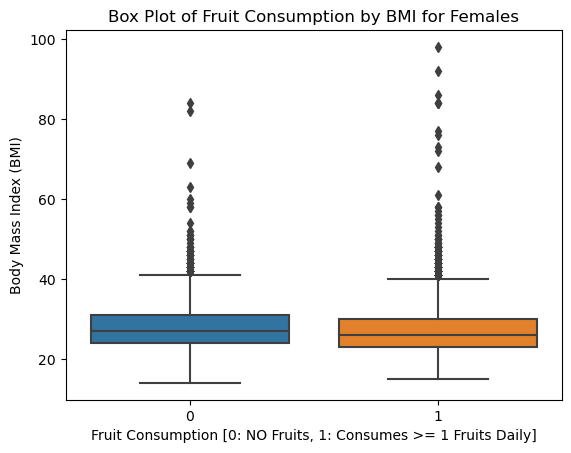

In [45]:
sns.boxplot(data = df, x = 'Fruits', y = 'BMI')
plt.xlabel("Fruit Consumption [0: NO Fruits, 1: Consumes >= 1 Fruits Daily]")
plt.ylabel('Body Mass Index (BMI)')
plt.title('Box Plot of Fruit Consumption by BMI for Females')
plt.show()

In [60]:
fruit_bmi_correlation = df['Fruits'].corr(df['BMI'])
print(fruit_bmi_correlation)

-0.07913722692439368


# Box Plot of Smoker by BMI

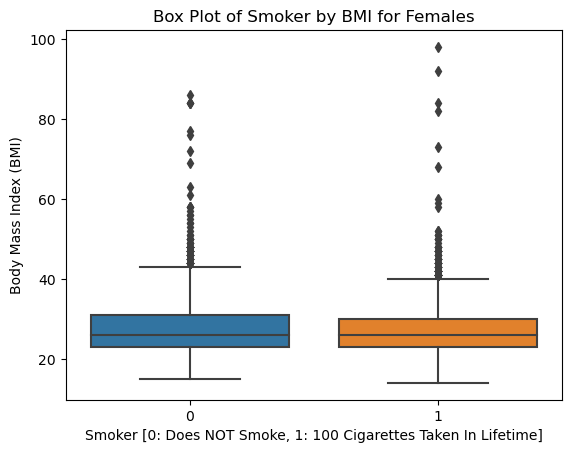

In [56]:
sns.boxplot(data = df, x = 'Smoker', y = 'BMI')
plt.xlabel('Smoker [0: Does NOT Smoke, 1: 100 Cigarettes Taken In Lifetime]')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Box Plot of Smoker by BMI for Females')
plt.show()

In [77]:
smoker_bmi_correlation = df['Smoker'].corr(df['BMI'])
print(smoker_bmi_correlation)

-0.005699920745745986


# Box Plot of Physical Activity by BMI

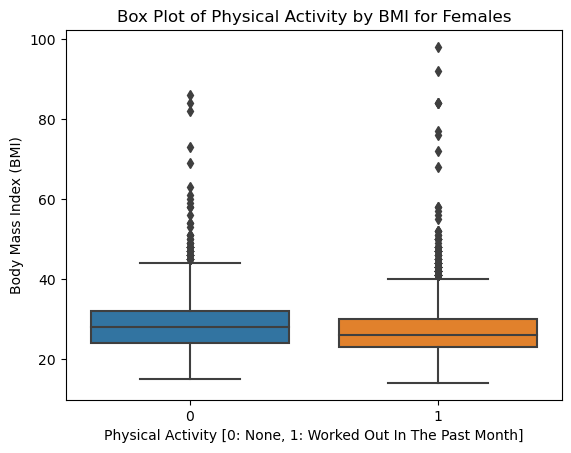

In [49]:
sns.boxplot(data = df, x = 'PhysActivity', y = 'BMI')
plt.xlabel('Physical Activity [0: None, 1: Worked Out In The Past Month]')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Box Plot of Physical Activity by BMI for Females')
plt.show()

In [64]:
physical_activity_bmi_correlation = df['PhysActivity'].corr(df['BMI'])
print(physical_activity_bmi_correlation)

-0.1509638442335407


# Box Plot of Heavy Alcohol Consumption by BMI

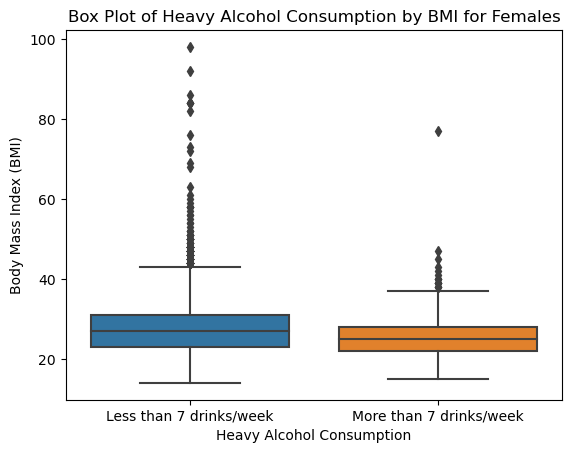

In [54]:
sns.boxplot(data = df, x = 'HvyAlcoholConsump', y = 'BMI')
plt.xlabel('Heavy Alcohol Consumption')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Box Plot of Heavy Alcohol Consumption by BMI for Females')
plt.show()

In [66]:
alcohol_bmi_correlation = df['HvyAlcoholConsump'].corr(df['BMI'])
print(alcohol_bmi_correlation)

-0.06925686848316162


# Box Plot of Income by BMI

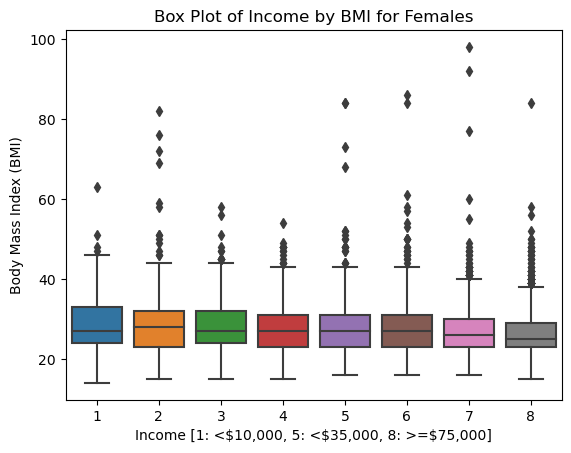

In [82]:
sns.boxplot(data = df, x = 'Income', y = 'BMI')
plt.xlabel('Income [1: <$10,000, 5: <$35,000, 8: >=$75,000]')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Box Plot of Income by BMI for Females')
plt.show()

In [81]:
income_bmi_correlation = df['Income'].corr(df['BMI'])
print(income_bmi_correlation)

-0.11848490057704697


# Box Plot of Education by BMI

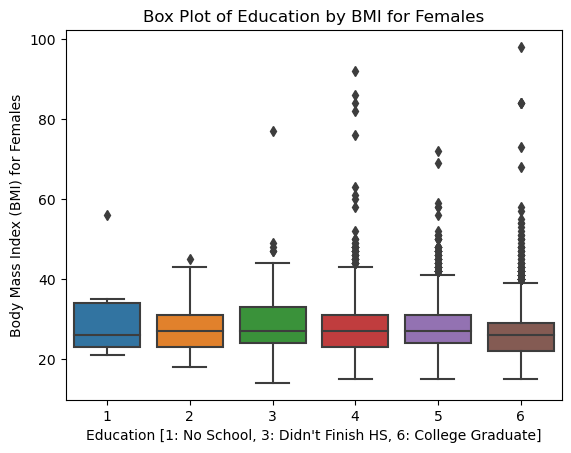

In [43]:
sns.boxplot(data = df, x = 'Education', y = 'BMI')
plt.xlabel("Education [1: No School, 3: Didn't Finish HS, 6: College Graduate]")
plt.ylabel('Body Mass Index (BMI) for Females')
plt.title('Box Plot of Education by BMI for Females')
plt.show()

In [83]:
education_bmi_correlation = df['Education'].corr(df['BMI'])
print(education_bmi_correlation)

-0.10410764237989067


# Percentage of Females with High Cholestrol Having High Blood Pressure

Text(0.5, 1.0, 'Percentage of Females with high cholestrol having high blood pressure')

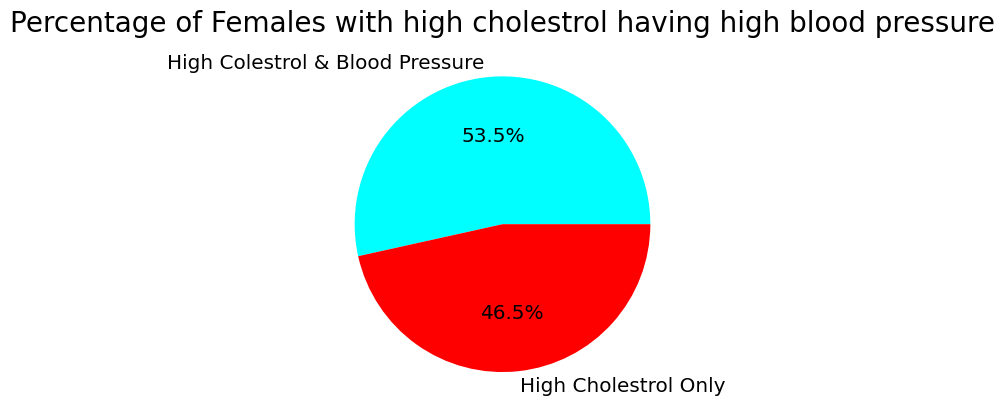

In [4]:
bp = np.array(df.iloc[:7070,1])

chol = np.array(df.iloc[:7070,2])

high_bp = np.sum(bp)

high_chol = np.sum(chol)

chol_and_bp=0

for i,j in enumerate(bp):
    for a,b in enumerate(chol):
        if(i == a):
            if(j == 1 and b == 1):
                chol_and_bp += 1
        else:
            pass
            
y = np.array([chol_and_bp/high_chol,1-(chol_and_bp/high_chol)])

x = np.array([chol_and_bp/high_bp,1-(chol_and_bp/high_bp)])

fig, (ax1) = plt.subplots(1) 

labels = ["High Colestrol & Blood Pressure","High Cholestrol Only"]
values = y
ax1.pie(values,labels = labels, colors = ['cyan','red'], autopct = '%1.1f%%', textprops = {'size': 'x-large'}) 
ax1.set_title('Percentage of Females with high cholestrol having high blood pressure', fontsize = 20)

# Distribution of Fruits Consumption Among Non-Diabetic Females

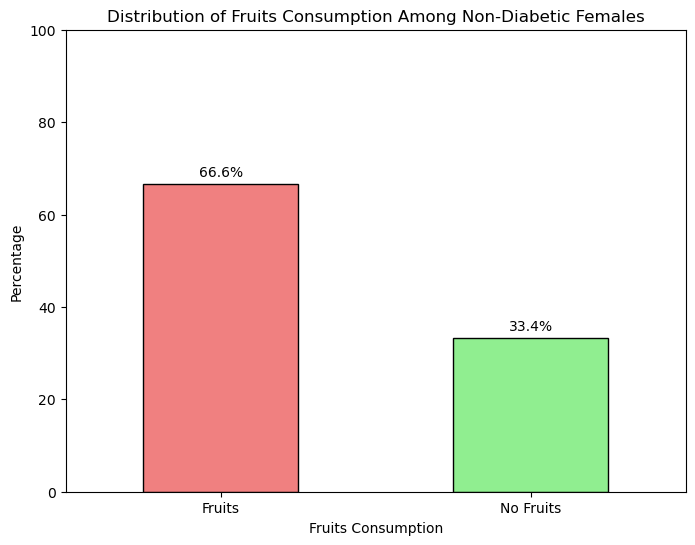

In [6]:
df['Fruits'] = df['Fruits'].replace({0: 'No Fruits', 1: 'Fruits'})
fruit_counts = df['Fruits'].value_counts()

fruit_percentages = fruit_counts / fruit_counts.sum() * 100

plt.figure(figsize=(8, 6))
colors = ['lightcoral', 'lightgreen']
fruit_percentages.sort_index().plot(kind = 'bar', color = colors, edgecolor = 'black')

plt.xlabel('Fruits Consumption')
plt.ylabel('Percentage')
plt.title('Distribution of Fruits Consumption Among Non-Diabetic Females')
plt.xticks(rotation = 0)
plt.ylim(0, 100) 

for i, percentage in enumerate(fruit_percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha = 'center', va = 'bottom')

plt.show()

# Distribution of Smokers Among Non-Diabetic Females

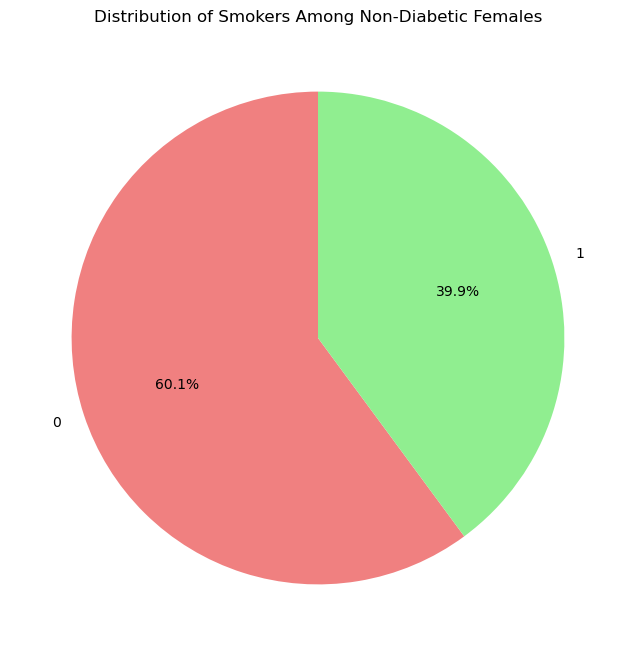

In [8]:
smoker_counts = df['Smoker'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(smoker_counts, labels = smoker_counts.index, autopct = '%1.1f%%', startangle = 90, colors = ['lightcoral', 'lightgreen'])
plt.title('Distribution of Smokers Among Non-Diabetic Females')
plt.show()

# Distribution of Alcohol Consumption Among Non-Diabetic Females

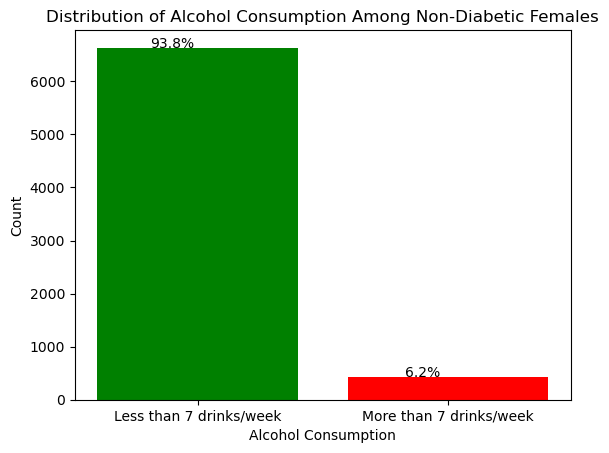

In [41]:
df = pd.read_csv('Project.Data.Females.csv')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].map({0: 'Less than 7 drinks/week', 1: 'More than 7 drinks/week'})

summary = df['HvyAlcoholConsump'].value_counts()

percentage_values = (summary / summary.sum()) * 100

bars = plt.bar(summary.index, summary.values, color = ['green', 'red'])

plt.title('Distribution of Alcohol Consumption Among Non-Diabetic Females')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')

for bar, percentage in zip(bars, percentage_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05,
             f'{percentage:.1f}%', ha = 'center', color = 'black')

plt.show()

# Distribution of Education Levels Among Non-Diabetic Females

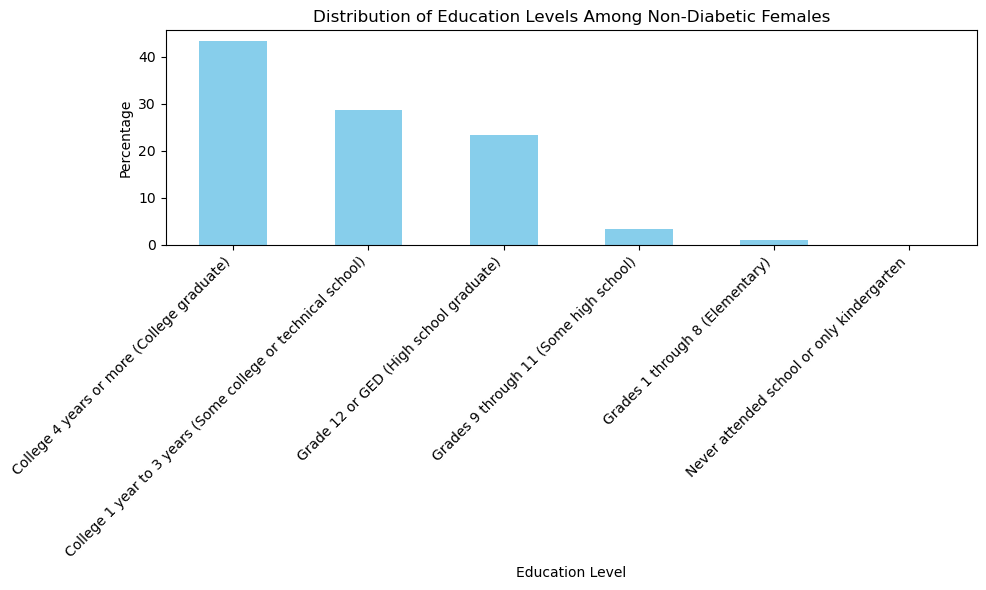

In [33]:
df['Education'] = df['Education'].replace({1:'Never attended school or only kindergarten',2:'Grades 1 through 8 (Elementary)', 3:'Grades 9 through 11 (Some high school)',4:'Grade 12 or GED (High school graduate)',5:'College 1 year to 3 years (Some college or technical school)',6:'College 4 years or more (College graduate)'})
education_counts = df['Education'].value_counts()

total_records = len(df)
education_percentages = (education_counts / total_records) * 100

plt.figure(figsize = (10, 6))
education_percentages.plot(kind='bar', color = 'skyblue')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Distribution of Education Levels Among Non-Diabetic Females')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# Distribution of Physical Activity Levels Among Non-Diabetic Females

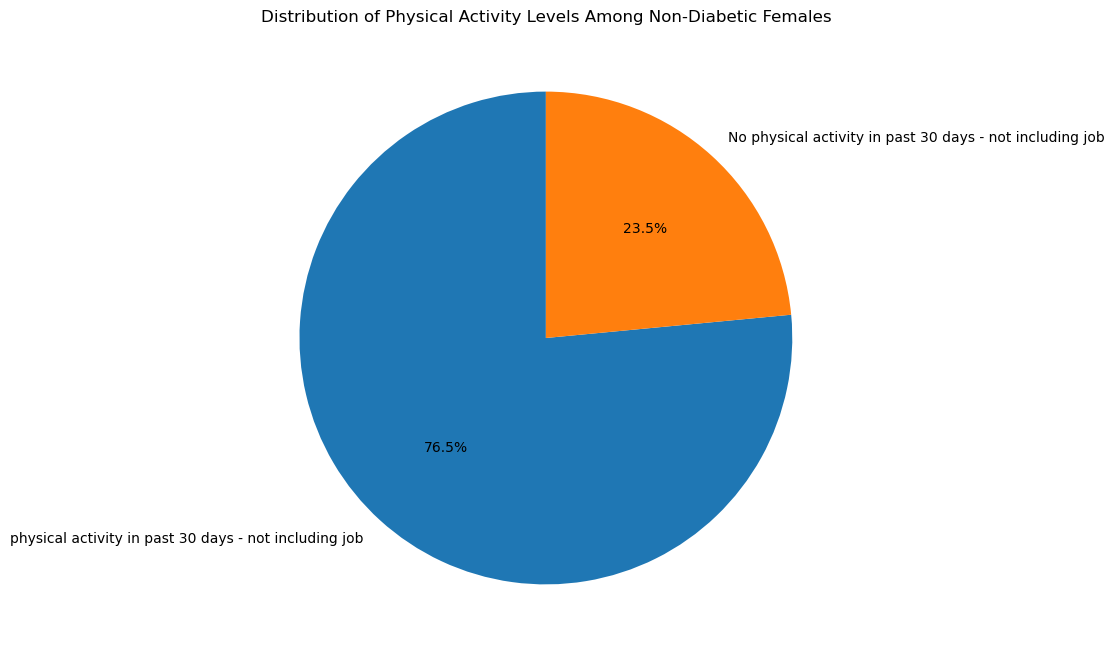

In [11]:
df['PhysActivity'] = df['PhysActivity'].replace({0: 'No physical activity in past 30 days - not including job', 1:'physical activity in past 30 days - not including job'})
activity_counts = df['PhysActivity'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Physical Activity Levels Among Non-Diabetic Females')
plt.show()

# Distribution of Income Levels Among Non-Diabetic Females

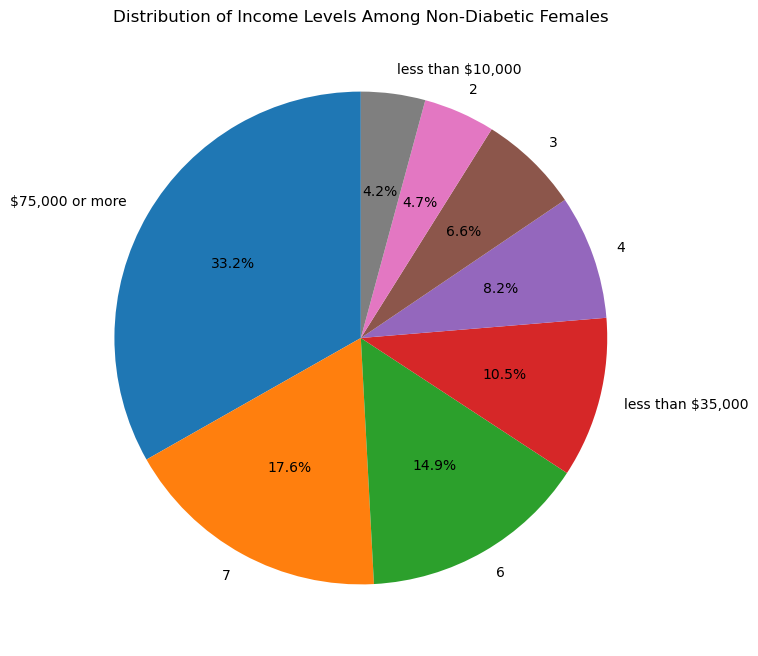

In [12]:
df['Income']=df['Income'].replace({1:'less than $10,000',5:'less than $35,000',8:'$75,000 or more'})
income_counts = df['Income'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Income Levels Among Non-Diabetic Females')
plt.show()